In [5]:
# Importing the Reuters dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [6]:
# Docoding the rewview wrod list
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news = ' '.join([reversed_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_news)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [8]:
# Importing numpy
import numpy as np

# Vectorizing input data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
# Vectorizing labels
def vectorize_labels(labels, dimension=46):
    results = np.zeros(len(labels), dimension)
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# But we do not need this definition

# Importing categorization reshaper
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
# Setting the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# Dividing into train set and train validation set
x_train_rest = x_train[:1000]
x_train_train = x_train[1000:]

y_train_rest = y_train[:1000]
y_train_train = y_train[1000:]

In [14]:
# Learning
history = model.fit(x_train_train, y_train_train, epochs=20, batch_size=512, validation_data = (x_train_rest,y_train_rest))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/step - loss: 2.5157 - acc: 0.5432 - val_loss: 1.7287 - val_acc: 0.6460
Epoch 2/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.4110 - acc: 0.6972 - val_loss: 1.3481 - val_acc: 0.6950
Epoch 3/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.0501 - acc: 0.7700 - val_loss: 1.1419 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.8178 - acc: 0.8265 - val_loss: 1.0296 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.6505 - acc: 0.8693 - val_loss: 0.9578 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.5154 - acc: 0.8976 - val_loss: 0.9031 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.4137 - acc: 0.9183 - val_loss: 0.8910 - val_acc: 0.8130


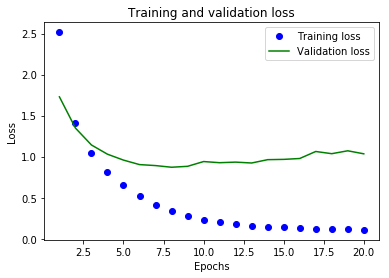

In [17]:
# Plotting the result's loss function
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_valid = history.history['val_loss']

epochs = range(1, len(loss_train) + 1)

plt.clf()
plt.plot(epochs, loss_train, 'bo', label='Training loss')
plt.plot(epochs, loss_valid, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

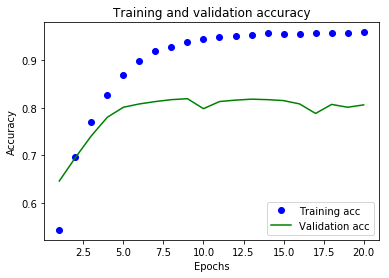

In [18]:
# Plotting the result's accuracy
import matplotlib.pyplot as plt

acc_train = history.history['acc']
acc_valid = history.history['val_acc']

epochs = range(1, len(loss_train) + 1)

plt.clf()
plt.plot(epochs, acc_train, 'bo', label='Training acc')
plt.plot(epochs, acc_valid, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Building a model dimnishing the overfiting
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))
model2.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model2.fit(x_train_train, y_train_train, epochs=9, batch_size=512, validation_data=(x_train_rest, y_train_rest))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 208us/step - loss: 2.5771 - acc: 0.4747 - val_loss: 1.6901 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 164us/step - loss: 1.3767 - acc: 0.7101 - val_loss: 1.2501 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 161us/step - loss: 1.0039 - acc: 0.7833 - val_loss: 1.0851 - val_acc: 0.7580
Epoch 4/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.7828 - acc: 0.8349 - val_loss: 0.9964 - val_acc: 0.7840
Epoch 5/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.6205 - acc: 0.8705 - val_loss: 0.9235 - val_acc: 0.8050
Epoch 6/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.4935 - acc: 0.8999 - val_loss: 0.9243 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s 163us/step - loss: 0.4007 - acc: 0.9178 - val_loss: 0.8751 - val_acc: 0.8120
Epoch 8

In [25]:
# Checking results for the test data
results = model2.evaluate(x_test, y_test)
print(results)

2246/2246 [==============================] - 0s 190us/step
[0.9797837343581107, 0.7836153161440804]


In [26]:
# Building a model with information bottleneck
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(4, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))
model3.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model3.fit(x_train_train, y_train_train, epochs=20, batch_size=128, validation_data=(x_train_rest, y_train_rest))
results3 = model3.evaluate(x_test, y_test)
print(results3)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 270us/step - loss: 3.3620 - acc: 0.2740 - val_loss: 2.9616 - val_acc: 0.2510
Epoch 2/20
7982/7982 [==============================] - 2s 232us/step - loss: 2.6895 - acc: 0.2487 - val_loss: 2.4712 - val_acc: 0.2550
Epoch 3/20
7982/7982 [==============================] - 2s 240us/step - loss: 2.0832 - acc: 0.2843 - val_loss: 1.8407 - val_acc: 0.2870
Epoch 4/20
7982/7982 [==============================] - 2s 236us/step - loss: 1.5130 - acc: 0.5890 - val_loss: 1.5068 - val_acc: 0.6210
Epoch 5/20
7982/7982 [==============================] - 2s 242us/step - loss: 1.2539 - acc: 0.6710 - val_loss: 1.4068 - val_acc: 0.6540
Epoch 6/20
7982/7982 [==============================] - 2s 246us/step - loss: 1.1192 - acc: 0.7161 - val_loss: 1.3996 - val_acc: 0.6830
Epoch 7/20
7982/7982 [==============================] - 2s 236us/step - loss: 1.0273 - acc: 0.7481 - val_loss: 1.3615 - val_acc: 0.6990


In [28]:
# Building a model with an additional layer
model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(46, activation='softmax'))
model4.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model4.fit(x_train_train, y_train_train, epochs=20, batch_size=512, validation_data=(x_train_rest, y_train_rest))
results4 = model4.evaluate(x_test, y_test)
print(results4)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 246us/step - loss: 2.5093 - acc: 0.4708 - val_loss: 1.7251 - val_acc: 0.5850
Epoch 2/20
7982/7982 [==============================] - 2s 199us/step - loss: 1.4796 - acc: 0.6607 - val_loss: 1.3781 - val_acc: 0.6880
Epoch 3/20
7982/7982 [==============================] - 1s 179us/step - loss: 1.1244 - acc: 0.7463 - val_loss: 1.2183 - val_acc: 0.7370
Epoch 4/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.8919 - acc: 0.8053 - val_loss: 1.0974 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.7070 - acc: 0.8411 - val_loss: 1.1105 - val_acc: 0.7520
Epoch 6/20
7982/7982 [==============================] - 2s 189us/step - loss: 0.5773 - acc: 0.8676 - val_loss: 0.9978 - val_acc: 0.7980
Epoch 7/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.4566 - acc: 0.8976 - val_loss: 1.0168 - val_acc: 0.7920


In [29]:
# Building a model with one less layer
model5 = models.Sequential()
model5.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(46, activation='softmax'))
model5.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model5.fit(x_train_train, y_train_train, epochs=20, batch_size=512, validation_data=(x_train_rest, y_train_rest))
results5 = model5.evaluate(x_test, y_test)
print(results5)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 203us/step - loss: 2.5849 - acc: 0.5658 - val_loss: 1.8489 - val_acc: 0.6490
Epoch 2/20
7982/7982 [==============================] - 1s 164us/step - loss: 1.4778 - acc: 0.7155 - val_loss: 1.3699 - val_acc: 0.7110
Epoch 3/20
7982/7982 [==============================] - 1s 155us/step - loss: 1.0678 - acc: 0.7902 - val_loss: 1.1407 - val_acc: 0.7770
Epoch 4/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.8265 - acc: 0.8353 - val_loss: 1.0185 - val_acc: 0.7940
Epoch 5/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.6599 - acc: 0.8717 - val_loss: 0.9590 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 177us/step - loss: 0.5381 - acc: 0.8939 - val_loss: 0.8889 - val_acc: 0.8180
Epoch 7/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.4431 - acc: 0.9123 - val_loss: 0.8496 - val_acc: 0.8280
